In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/DSA/data.csv")

In [3]:
data.head()

,Patient_ID,Name,Age,Age_Group,Gender,Race,Side_Effect
0,P1,Chelsey Gutierrez,23.0,Young (<30),Female,African American,Mild Side Effect
1,P2,Patricia Coleman,30.0,Middle-aged (30-60),Male,Caucasian,No Side Effect
2,P3,Caitlin Powell,31.0,Middle-aged (30-60),Female,Asian,Mild Side Effect
3,P4,Sandra Simmons,37.0,Middle-aged (30-60),Male,Hispanic,Mild Side Effect
4,P5,Anthony Banks,41.0,Middle-aged (30-60),Male,Caucasian,No Side Effect


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Patient_ID   400000 non-null  object 
 1   Name         400000 non-null  object 
 2   Age          360071 non-null  float64
 3   Age_Group    400000 non-null  object 
 4   Gender       400000 non-null  object 
 5   Race         400000 non-null  object 
 6   Side_Effect  400000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 21.4+ MB


In [5]:
data.isna().sum()

Patient_ID         0
Name               0
Age            39929
Age_Group          0
Gender             0
Race               0
Side_Effect        0
dtype: int64

In [6]:
# Handling missing values

In [7]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [8]:
data['Age'].head()

0    23.0
1    30.0
2    31.0
3    37.0
4    41.0
Name: Age, dtype: float64

In [9]:
data.isna().sum()

Patient_ID     0
Name           0
Age            0
Age_Group      0
Gender         0
Race           0
Side_Effect    0
dtype: int64

**EDA**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Age Distribution')

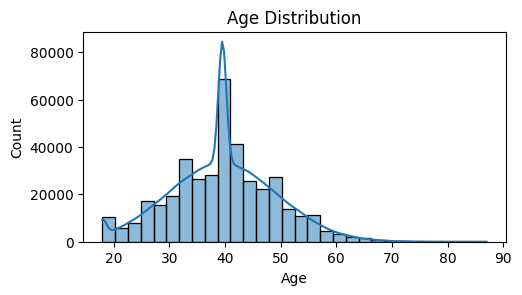

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')






In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Side_Effect" column to numeric labels
data["Side_Effect_Labels"] = label_encoder.fit_transform(data["Side_Effect"])

# Now, the "Side_Effect_Labels" column contains numeric labels


In [17]:

correlation_age = data["Age"].corr(data["Side_Effect_Labels"])
correlation_age


-0.00654264801190584

In [18]:
# Encode categorical variables
label_encoders = {}
categorical_features = ["Age_Group", "Gender", "Race"]
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])


In [19]:
# Splitting the data into training and testibng sets

In [20]:
# Split the data into train and test sets
X = data.drop(columns=["Patient_ID", "Name", "Side_Effect"])
y = data["Side_Effect"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Build and train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 1.0
                     precision    recall  f1-score   support

Extreme Side Effect       1.00      1.00      1.00     27403
   Mild Side Effect       1.00      1.00      1.00     40070
     No Side Effect       1.00      1.00      1.00     12527

           accuracy                           1.00     80000
          macro avg       1.00      1.00      1.00     80000
       weighted avg       1.00      1.00      1.00     80000



In [22]:
y_pred

array(['Mild Side Effect', 'Mild Side Effect', 'No Side Effect', ...,
       'No Side Effect', 'Extreme Side Effect', 'Extreme Side Effect'],
      dtype=object)

In [23]:
# SVM

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create an SVM classifier with a pipeline for scaling
svm_classifier = Pipeline([
    ("scaler", StandardScaler()),  # Standard scaling is applied here
    ("svm", SVC(random_state=42))
])

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with SVM:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy with SVM: 1.0
                     precision    recall  f1-score   support

Extreme Side Effect       1.00      1.00      1.00     27403
   Mild Side Effect       1.00      1.00      1.00     40070
     No Side Effect       1.00      1.00      1.00     12527

           accuracy                           1.00     80000
          macro avg       1.00      1.00      1.00     80000
       weighted avg       1.00      1.00      1.00     80000



In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
from sklearn.model_selection import cross_val_predict

In [26]:
predicted = cross_val_predict(model, X, y, cv=5)


In [27]:
conf_matrix = confusion_matrix(y, predicted)
print(conf_matrix)


[[136544      0      0]
 [     0 199931      0]
 [     0      0  63525]]


In [28]:
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
print("Precision:", precision)


Precision: 1.0


kNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create a KNN classifier
knn_classifier = Pipeline([
    ("scaler", StandardScaler()),  # Standard scaling is applied here
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with KNN:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy with KNN: 1.0
                     precision    recall  f1-score   support

Extreme Side Effect       1.00      1.00      1.00     27403
   Mild Side Effect       1.00      1.00      1.00     40070
     No Side Effect       1.00      1.00      1.00     12527

           accuracy                           1.00     80000
          macro avg       1.00      1.00      1.00     80000
       weighted avg       1.00      1.00      1.00     80000

